## Menggambil library yang dibutuhkan saat menjalankan model

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from imageio import imread

## Melihat isi di dalam folder

In [2]:
print(os.listdir("cats_and_dogs_filtered"))

['train', 'validation', 'vectorize.py']


## Membagi data menjadi train dan testing(valdiation)

In [3]:
df_data = 'cats_and_dogs_filtered/train'
df_validation = 'cats_and_dogs_filtered/validation'

## Menampilkan isi data

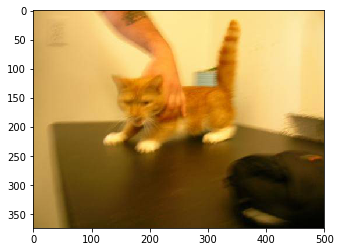

In [4]:
import pytesseract
from PIL import Image

image = Image.open('cats_and_dogs_filtered/train/cats/cat.22.jpg')
imgplot = plt.imshow(image)
plt.show()

In [5]:
dogs_dir ='cats_and_dogs_filtered/train/dogs'
cats_dir = 'cats_and_dogs_filtered/train/cats'

In [6]:
data = []
labels = []

for u in os.listdir(cats_dir):
    try:
        
        image = imread("cats_and_dogs_filtered/train/cats"+"/"+u)
        image_array = Image.fromarray(image, 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(0)
        
    except AttributeError:
        print('')
        
for v in os.listdir(dogs_dir):
    try:
        
        image = imread("cats_and_dogs_filtered/train/dogs"+"/"+v)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100 , 100))
        data.append(np.array(resize_img))
        labels.append(1)
        
    except AttributeError:
        print('')



In [7]:
animal = np.array(data)
labels = np.array(labels)

In [8]:
np.shape(animal)

(2000, 100, 100, 3)

In [9]:
print('animal : {} | labels : {}'.format(animal.shape , labels.shape))

animal : (2000, 100, 100, 3) | labels : (2000,)


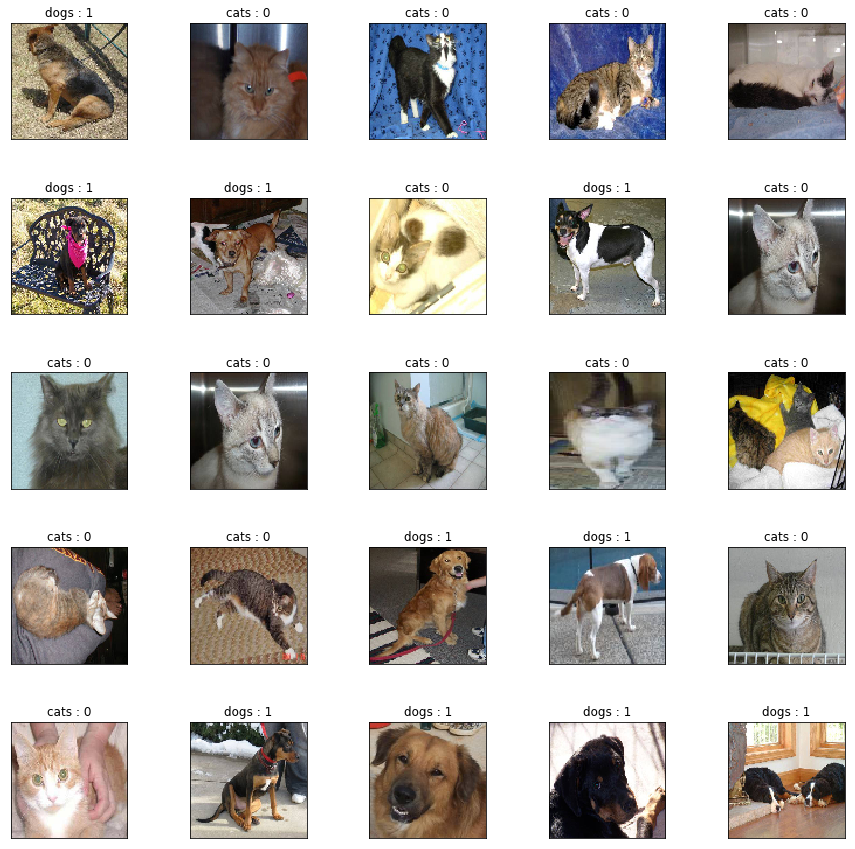

In [10]:
def animal_type(x):
    if x==0:
        return 'cats'
    else: 
        return 'dogs'


plt.figure(1 , figsize = (15 , 15))
n = 0 
for i in range(25):
    n += 1 
    r = np.random.randint(0 , animal.shape[0] , 1)
    plt.subplot(5 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(animal[r[0]])
    plt.title('{} : {}'.format(animal_type(labels[r[0]]), labels[r[0]]))
    plt.xticks([]) , plt.yticks([])
    
plt.show()

## Preprocessing data

In [18]:
from keras_preprocessing.image import ImageDataGenerator

In [43]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.30,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=.4
)

trainGenerator = ImageDataGenerator(
                rescale=1./255, 
                rotation_range=30,
                zoom_range=0.15,
                width_shift_range=0.15, 
                height_shift_range=0.15, 
                horizontal_flip=True,
                vertical_flip=True,
                )

In [44]:
BATCH_SIZE = 32
IMAGE_WIDTH = 192
IMAGE_HEIGHT = 192

In [45]:
training_generator = training_data_generator.flow_from_directory(
    df_data,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
#     color_mode='rgb',
    class_mode="binary")
validation_generator = training_data_generator.flow_from_directory(
    df_validation,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
#     seed = 42,
#     color_mode='rgb',
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 

In [46]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same",
#                            activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    
#     tf.keras.layers.MaxPool2D(strides=2),
#     tf.keras.layers.Dropout(0.2, seed=42),
    
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
#     tf.keras.layers.MaxPool2D(strides=2),
#     tf.keras.layers.Dropout(0.2, seed=42),
    
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
#     tf.keras.layers.MaxPool2D(strides=2),
#     tf.keras.layers.Dropout(0.2, seed=42),
    
# #     tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
# #     tf.keras.layers.MaxPool2D(strides=2),
    
#     tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"),
#     tf.keras.layers.MaxPool2D(strides=2),
    
#     tf.keras.layers.Dropout(0.4, seed=42), # 0.5 loss tinggi
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation="relu"),
#     tf.keras.layers.Dense(2, activation="softmax")
# ])
# model.summary()


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size = (3, 3), padding="same",
                           activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size = (3, 3), padding="same", activation="relu"),

    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Dropout(0.2, seed=42),
    
    tf.keras.layers.Conv2D(filters=64,kernel_size = (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size = (3, 3), padding="same", activation="relu"),

    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Dropout(0.2, seed=42),
    
    tf.keras.layers.Conv2D(filters=128,kernel_size = (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size = (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Dropout(0.2, seed=42),
    
#     tf.keras.layers.Conv2D(filters=256, kernel_size = (3, 3), padding="same", activation="relu"),
#     tf.keras.layers.Conv2D(filters=256, kernel_size = (3, 3), padding="same", activation="relu"),
#     tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dropout(0.5, seed=42),
  
    tf.keras.layers.Dense(1, activation="softmax")
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 192, 192, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 95, 95, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 95, 95, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 47, 47, 128)      

In [47]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(patience=15, verbose=1)

LR_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                            patience=12, 
                            verbose=1, 
                            factor=2/3, 
                            min_lr=1e-5)
callbacks = [early_stop, LR_reduce]

In [49]:
epochs=5
history = model.fit(
    training_generator,
    steps_per_epoch=math.ceil(2000/BATCH_SIZE), 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks= callbacks
)

Train for 63 steps, validate for 32 steps
Epoch 1/5
63/63 [==============================] - 314s 5s/step - loss: 7.6666 - accuracy: 0.5000


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("# of epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [280]:
#read test images and capture predictions
test_img_files = os.listdir(df_validation)
test_files = np.random.choice(a = test_img_files, size = 20)
ite_input_test = []
#Read each input image and get labels
for test_file in test_files:
    test_dog_cat = get_img_files(test_dir,test_file)
    ite_input_test.append(test_dog_cat)

# Return a tuple of (input,output) to feed the network
test_x = np.array( ite_input_test)

predictions = history.predict(test_x, verbose=0)

NameError: name 'get_img_files' is not defined

In [281]:
for i in range(0,20):
    if predictions[i, 0] >= 0.5: 
        print('saya {:.2%} yakin ini kucing'.format(predictions[i][0]))
    else: 
        print('saya {:.2%} yakin ini anjing'.format(1-predictions[i][0]))
    
    plt.imshow(ite_input_test[i])
    plt.show()    

NameError: name 'predictions' is not defined

untuk epoch 50 dengan jumlah
Total params: 5,256,130
Trainable params: 5,256,130
Non-trainable params: 0
dan fill_mode='constant'
epcoh terbaik saat 12/50

dengan 
Total params: 11,317,954
Trainable params: 11,317,954
Non-trainable params: 0
dan dropout 0.25
dan fill_mode ''